**Interview questions to test data science skills**
Sensor Data - Solve the Question
---




# Let's load the data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as sm
from sklearn import tree
from sklearn.tree import plot_tree, export_text

##IMPORTING DATA


In [3]:
sensor_data = pd.read_csv("https://raw.githubusercontent.com/ganesh82/Joining/main/sensor_data.csv",parse_dates=['datetimeindex'])
                          
                        

In [4]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   s1             8641 non-null   float64       
 1   s2             8641 non-null   float64       
 2   s3             8641 non-null   float64       
 3   s4             8641 non-null   float64       
 4   s5             8641 non-null   float64       
 5   s6             8641 non-null   float64       
 6   s7             8641 non-null   float64       
 7   output         8641 non-null   float64       
 8   datetimeindex  8641 non-null   datetime64[ns]
 9   timestamp      8641 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 675.2 KB


In [5]:
sensor_data.head(5)

,s1,s2,s3,s4,s5,s6,s7,output,datetimeindex,timestamp
0,-1.396476,0.655763,2.886372,-1.195422,0.117379,0.313597,0.017088,-33.213946,2019-01-05 00:00:00,1.560000e+12
1,0.112707,-0.672098,0.258705,-0.409358,-0.034855,0.123312,-0.708757,-385.021011,2019-01-05 00:05:00,1.560000e+12
2,0.923764,0.289820,0.984117,0.617017,1.366399,0.697224,0.826500,42.456935,2019-01-05 00:10:00,1.560000e+12
3,1.262034,-0.151696,0.912821,1.233674,-0.299812,1.274848,1.249682,131.998723,2019-01-05 00:15:00,1.560000e+12
4,0.032973,1.255812,6.650511,0.126005,1.962693,0.642212,0.343491,255.052726,2019-01-05 00:20:00,1.560000e+12


# Now that the data is loaded. let's begin!!!

# **About the data**

---
This is time series data for one month (May month) collected for 7 different sensors. The column "output" is the response of whole system. 

"output" should be predicted a function of the sensors


## Q1. Do an EDA on the data, correlation plots, features that might be important for the modeling. Share your observations. Comment on how the data looks from modeling perspective

###DESCRIBE
ALL SENSORS HAVE A MIN VALUE IN RANGE OF  APPROX.-3.8 AND MAX OF APPROX3.5-3.7. bUT SENSOR 3 AND SENSOR 6 ARE VERY DIFFERENT.

In [113]:
sensor_data.describe()

,s1,s2,s3,s4,s5,s6,s7,output,timestamp
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8.641000e+03
mean,-0.004851,-0.009813,1.637555,0.006552,0.003199,1.647467,0.020842,0.332266,1.560000e+12
std,0.991185,0.993297,2.099537,1.006075,0.994567,2.103000,1.007686,170.275468,0.000000e+00
min,-3.858669,-3.817856,0.035742,-3.945046,-3.880898,0.021253,-3.957313,-675.287902,1.560000e+12
25%,-0.671201,-0.689241,0.506729,-0.676676,-0.677416,0.500096,-0.645400,-109.952901,1.560000e+12
50%,-0.013984,-0.013472,1.010103,0.006230,0.004254,0.995203,0.024343,1.701933,1.560000e+12
75%,0.668072,0.673422,1.956658,0.695810,0.669917,1.969429,0.709364,114.582876,1.560000e+12
max,3.581097,3.788633,48.139842,3.782404,3.722885,29.102934,3.472889,643.499968,1.560000e+12


###CHECK FOR MISSING VALUES

In [7]:
#to check for missing values
sensor_data.isnull().sum()

s1               0
s2               0
s3               0
s4               0
s5               0
s6               0
s7               0
output           0
datetimeindex    0
timestamp        0
dtype: int64

###BOX PLOT FOR CONTINUOUS VARIBALE EXPLORATIN: BEHAVIOUR OR PATTERNS OF S3 AND S6 IS VERY DIFFERNET FROM OTHER SENSORS

<Axes: >

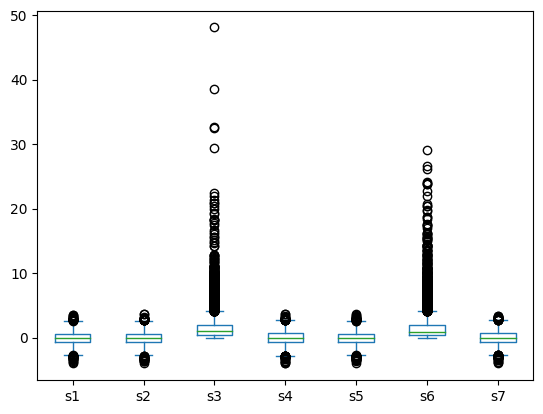

In [8]:
sensor_data[['s1','s2','s3', 's4', 's5', 's6','s7',]].plot(kind='box')

###PERCENTILE - CONTINUOUS VARIBALE EXPLORATION : SENSOR 3 AND SENSOR 6 VALUES ARE FAR OFF FROM OTHER SENSORS.

In [9]:
sensor_data[['s1','s2','s3', 's4', 's5', 's6','s7']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,s1,s2,s3,s4,s5,s6,s7
0.10,-1.284110,-1.281364,0.268503,-1.279940,-1.262101,0.275353,-1.292745
0.20,-0.826359,-0.855806,0.429433,-0.843858,-0.840834,0.424857,-0.826504
0.30,-0.532073,-0.546961,0.590072,-0.525911,-0.516884,0.587561,-0.480409
0.40,-0.263897,-0.266275,0.772595,-0.256615,-0.245554,0.777265,-0.218739
0.50,-0.013984,-0.013472,1.010103,0.006230,0.004254,0.995203,0.024343
0.60,0.242694,0.241353,1.302550,0.266713,0.253191,1.295754,0.280275
0.70,0.523606,0.513762,1.676167,0.538852,0.521849,1.692362,0.552594
0.80,0.827662,0.845867,2.327835,0.862210,0.836489,2.311006,0.875838
0.90,1.266118,1.275081,3.651338,1.292289,1.296008,3.604906,1.314866
0.93,1.471074,1.467932,4.399979,1.493835,1.491761,4.350054,1.503012


###HISTOGRAM:CONTINUOUS VARIBALE EXPLORATION. VARIBALES S1,2,4,5,7 HAVE A SIMILAR PATTERN BUT VARIBALE S2&S6 HAVE A DIFFERENT PATTERN FROM THE REST.

<Axes: ylabel='Frequency'>

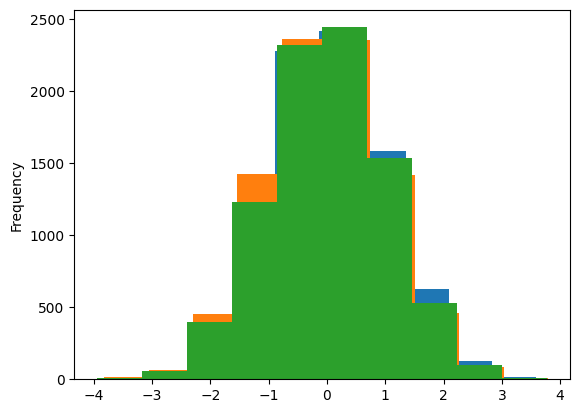

In [10]:
sensor_data['s1'].plot(kind='hist')
sensor_data['s2'].plot(kind='hist')
sensor_data['s4'].plot(kind='hist')


<Axes: ylabel='Frequency'>

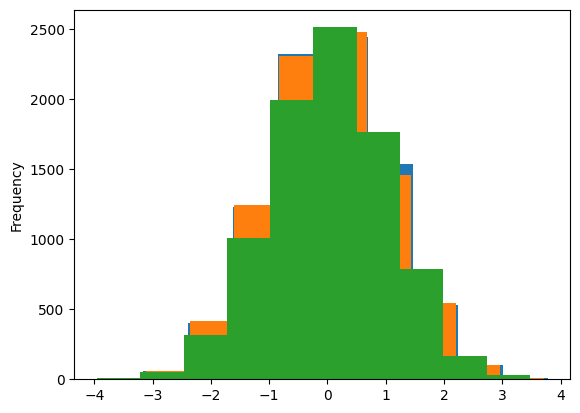

In [11]:
sensor_data['s4'].plot(kind='hist')
sensor_data['s5'].plot(kind='hist')
sensor_data['s7'].plot(kind='hist')


<Axes: ylabel='Frequency'>

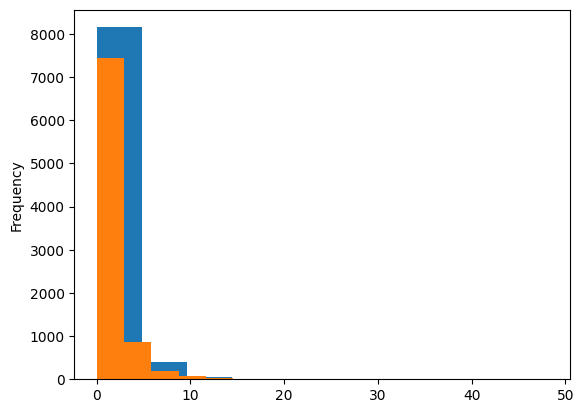

In [12]:
sensor_data['s3'].plot(kind='hist')
sensor_data['s6'].plot(kind='hist')



###CONTINUOUS VARIBALE EXPLORATION USUING SCATTERPLOT. IN S1,S2,S4,S5 POINTS R CENTRALLY LOCATED BUT IN S3 AND S6 POINTS ARE NOT CENTRALLY LOCATED. 

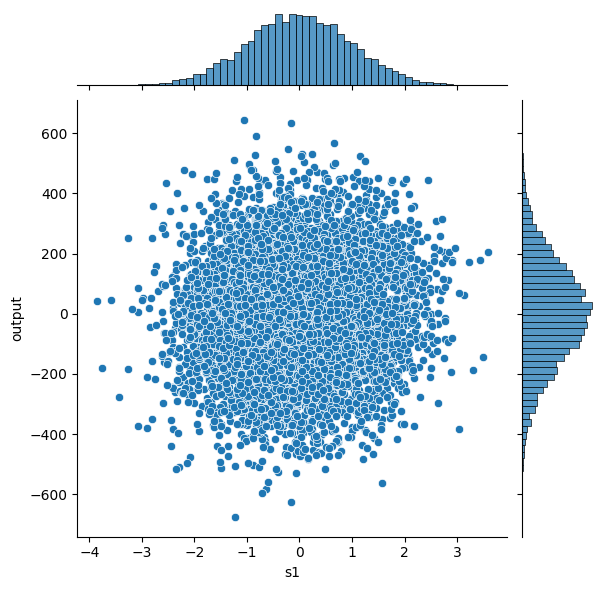

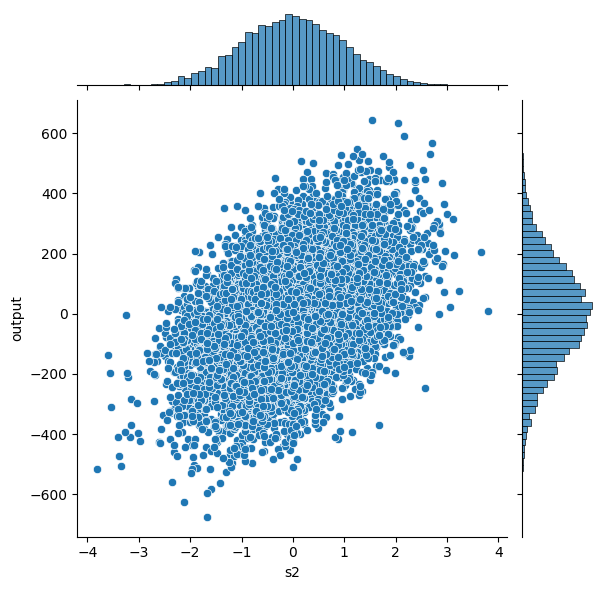

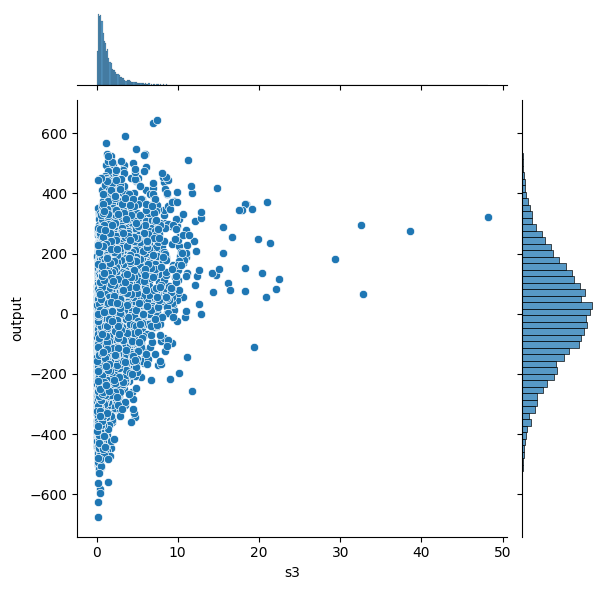

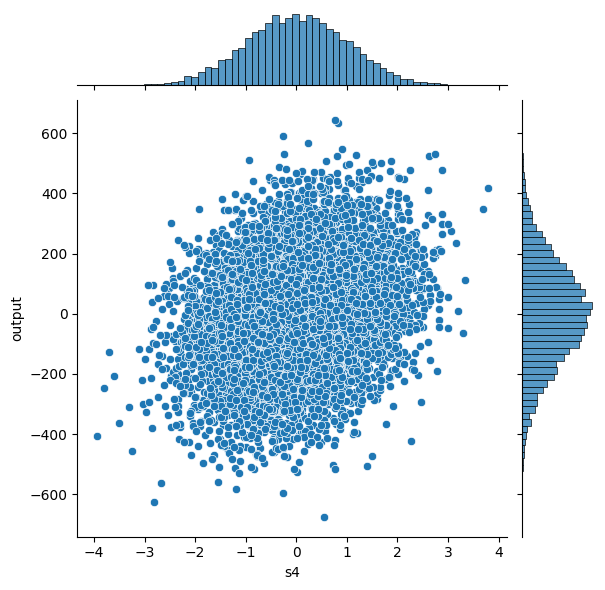

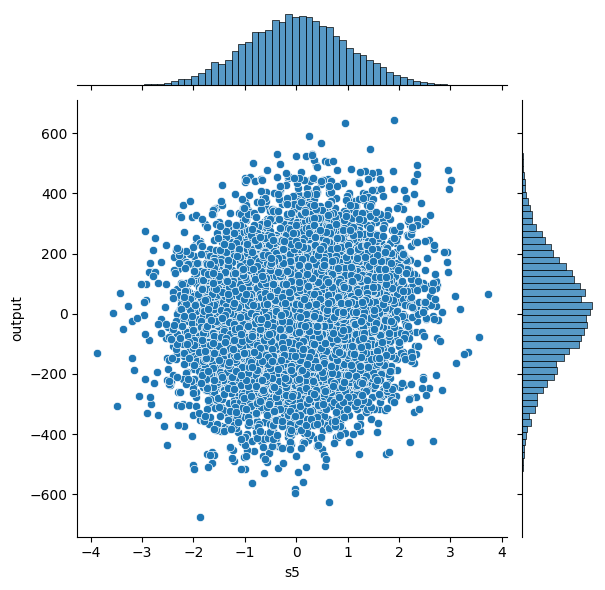

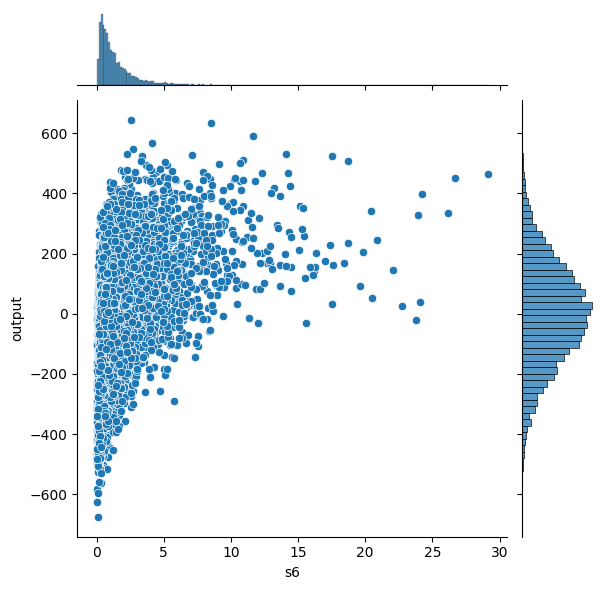

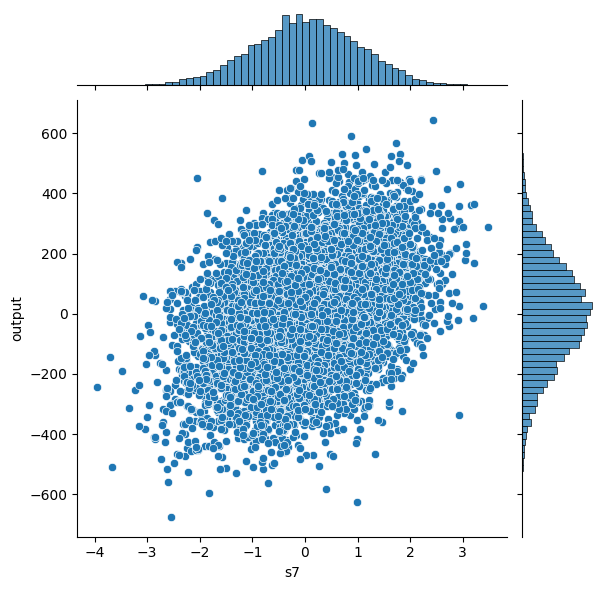

In [13]:
#scatterplot to see corelation 
sns.jointplot(x='s1', y='output', data=sensor_data)
sns.jointplot(x='s2', y='output', data=sensor_data)
sns.jointplot(x='s3', y='output', data=sensor_data)
sns.jointplot(x='s4', y='output', data=sensor_data)
sns.jointplot(x='s5', y='output', data=sensor_data)
sns.jointplot(x='s6', y='output', data=sensor_data)
sns.jointplot(x='s7', y='output', data=sensor_data)

## Q2. Check for any seasonality in data. Plot a rolling mean and resample mean for each of the sensors.

###ROLLING MEAN

In [151]:
sensor_data.rolling(6).mean()[:15]

<ipython-input-151-9a05654e5031>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['datetimeindex'], dtype='object')
  sensor_data.rolling(6).mean()[:15]


,s1,s2,s3,s4,s5,s6,s7,output,timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.213390,0.236947,2.017465,-0.249326,0.472149,0.763923,0.178721,-14.790489,1.560000e+12
6,0.651899,0.237034,1.646605,0.039675,0.290987,0.856755,-0.057564,-13.002631,1.560000e+12
7,0.552742,0.396585,1.934388,-0.188723,0.261130,0.982027,0.074766,45.646259,1.560000e+12
8,0.372448,-0.043200,1.980499,-0.308461,0.001545,0.940426,0.025396,-2.049083,1.560000e+12
9,0.279313,0.112097,1.859320,-0.437223,-0.124623,0.839232,-0.284868,-40.155184,1.560000e+12


###RESSAMPLE MEAN

In [15]:
sensor_data_V1=sensor_data.set_index(pd.DatetimeIndex(sensor_data["datetimeindex"])).drop("datetimeindex",axis=1)

In [152]:
sensor_data.resample('M',on="datetimeindex").mean()

,s1,s2,s3,s4,s5,s6,s7,output,timestamp
datetimeindex,,,,,,,,,
2019-01-31,0.013099,-0.028172,1.627074,-0.101879,0.001140,1.596980,-0.060078,-15.368863,1.560000e+12
2019-02-28,-0.027615,0.058923,2.064049,0.158267,-0.019598,1.627388,-0.050616,22.711057,1.560000e+12
2019-03-31,-0.061345,0.064332,1.460349,0.050951,0.042813,1.611818,0.060804,-2.043983,1.560000e+12
2019-04-30,-0.003464,0.050344,1.731564,-0.059056,-0.028262,1.652808,0.031994,18.873040,1.560000e+12
2019-05-31,-0.001496,-0.010681,1.616396,-0.006893,0.007521,1.661824,0.027872,-0.716648,1.560000e+12
2019-06-30,-0.128385,-0.117015,1.748720,0.047844,-0.029391,1.538373,0.080239,-0.812904,1.560000e+12
2019-07-31,0.076376,0.046621,1.813754,0.016526,-0.042321,1.640748,-0.007042,8.405439,1.560000e+12
2019-08-31,-0.021978,-0.114500,1.494156,0.065295,0.065915,1.620497,-0.023905,-10.622900,1.560000e+12
2019-09-30,-0.065526,0.054443,1.589148,0.037987,0.089091,1.328323,-0.026737,-10.841175,1.560000e+12


## Q3. Fit a linear regression to this data with y as "output" column. Comment on the fit of the model

##Rsquare for linear regression model: 75% which is less than industry standard of 80%. Also, in test_train of linear regression model, MAPE on test data 2.49 whereas MAPE on train data 0.64. 

###OLS RESGRESSION MODEL

In [ ]:
sensor_data.info()

In [ ]:
sensor_data_V1.info()

In [19]:
import statsmodels.formula.api as sm
model = sm.ols(formula='output ~ s1+s2+s3+s4+s5+s6+s7', data=sensor_data)
fitted1 = model.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3744.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:54:39   Log-Likelihood:                -50625.
No. Observations:                8641   AIC:                         1.013e+05
Df Residuals:                    8633   BIC:                         1.013e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.8140      1.367    -73.768      0.0

###CHECKING MULTICOLLINERAITY

In [24]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [26]:
vif_cal(input_data=sensor_data_V1, dependent_col="output")

s1  VIF =  1.0
s2  VIF =  1.0
s3  VIF =  1.0
s4  VIF =  1.0
s5  VIF =  1.0
s6  VIF =  1.0
s7  VIF =  1.0
timestamp  VIF =  0.0


/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


###VALIDATION OF LINEAR REGRESSION USUING TEST_TRAIN DATASET

In [20]:
features=['s1','s2','s3','s4','s5','s6','s7']

X = sensor_data[features]
y = sensor_data['output']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn 
model1 = sklearn.linear_model.LinearRegression()
model1.fit(X_train, y_train)

#Rsquared value on train and test data
from sklearn import metrics
y_pred_train=model1.predict(X_train)
print("Train RSquared", metrics.r2_score(y_train,y_pred_train))

y_pred_test=model1.predict(X_test)
print("Test RSquared",metrics.r2_score(y_test,y_pred_test))

import numpy as np
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))


(6912, 7)
(6912,)
(1729, 7)
(1729,)
Train RSquared 0.7492027697614074
Test RSquared 0.7636270522190994
MAPE on Train data :  0.64
MAPE on Test data :  2.49


## Q4. Fit a simple decision tree regressor to this data. Comment about the fit of the model

### DECISION TREE REGRESSOR

In [64]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [65]:
features=['s1','s2','s3','s4','s5','s6','s7']
X = sensor_data[features]
y = sensor_data['output']

In [66]:
regressor = DecisionTreeRegressor()
regressor.fit(sensor_data[features], sensor_data['output'])

DecisionTreeRegressor()

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(sensor_data['output'], regressor.predict(sensor_data[features]))

0.0

##Error 0,which looks like model fits well this level. But this is not true picture. lets test our model usuing test train data

###VALIDATION OF DECISION TREE: TEST_TRAIN. ##Error in test train model is very high 70.9

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [56]:
# Fitting Decision Tree Regression to the test train dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred = regressor.predict(X_test)
y_pred

array([ -44.27662401, -109.0639916 , -179.6118699 , ...,  166.4594449 ,
        -95.7870336 ,  -40.68589685])

In [58]:
mean_absolute_error(y_test,y_pred)

70.96591557202024

In [59]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
7577,-5.471747,-44.276624
3804,-230.889272,-109.063992
8539,-273.601341,-179.611870
8465,188.588829,214.757177
4839,-6.097204,-20.608061
...,...,...
6106,-30.781434,-104.875373
2252,8.898717,-24.916462
3727,254.313246,166.459445
1202,-122.601794,-95.787034


## Q5. Fit a Random forest regressor. Compare this with simple dicision tree. If Random forest is better then why

###RANDOM FOREST REGRESSOR. VALUE OF ERROR IS 15.7

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from pprint import pprint

In [70]:
features=['s1','s2','s3','s4','s5','s6','s7']
X = sensor_data[features]
y = sensor_data['output']

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor() 
rf_regressor.fit(sensor_data[features], sensor_data['output'])

RandomForestRegressor()

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(sensor_data['output'], rf_regressor.predict(sensor_data[features]))

15.753435679032474

###VALIDATION OF RANDOM FORREST REGRESSOR.##ERROR HERE INCREASES TO 43.15. 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [74]:
rf_regressor = RandomForestRegressor() 
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
y_pred = rf_regressor.predict(X_test)
y_pred

array([ -19.47851691, -204.99083971, -184.96173776, ...,  197.27130843,
        -87.42962036,  -31.26457842])

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

43.156546524794884

In [42]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
7577,-5.471747,-29.618611
3804,-230.889272,-205.831805
8539,-273.601341,-176.122173
8465,188.588829,188.945703
4839,-6.097204,-8.460232
...,...,...
6106,-30.781434,-50.718868
2252,8.898717,2.572531
3727,254.313246,205.106731
1202,-122.601794,-87.517801


## Q6. How do improve the accuracy of Random forest regressor

In [153]:
# Cross Validation
# Grid Search
# Hyperparametr Tunning

###CURRENT PARAMETER GRID FOR RANDOM FOREST REGRESSOR 

In [77]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


###FINDING AND USUING BEST HYPERPARAMETER GRID 

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [155]:
features=['s1','s2','s3','s4','s5','s6','s7']
X = sensor_data[features]
y = sensor_data['output']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [107]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)   
    return y_test,y_predict

In [157]:
best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
print ("Best Score:" ,best_score)
print ("Best params:",best_params) 

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Score: 0.8903755417950141
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}


## Q7. Generate a random distribution of samples from data such that each day should contain 12 continous samples and start of the sample should be random with that day

bootstrap

## Q8. Cluster the input variables using KMeans and GMM.
       
1.   Draw the contour plots
2.   Explain the hyper-parameters you choose and why?



K-Means and Gaussian Mixture Models (GMM). We then use each of these methods to cluster the same example set of data.

###K-MEANS: ELBOW METHOD WAS USED TO FIND THE OPTIMAL NUMBER OF CLUSTERS. 

In [131]:
#import required packages for analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [139]:
kmeans = KMeans(2)
kmeans.fit(sensor_data_V1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [140]:
identified_clusters = kmeans.fit_predict(sensor_data_V1)
identified_clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

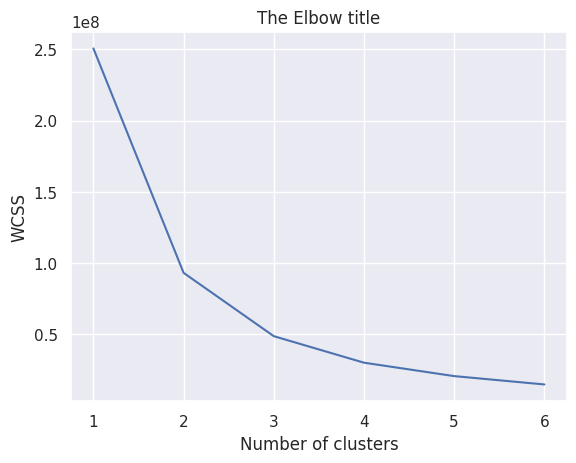

In [138]:
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(sensor_data_V1)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

###GMM

In [149]:
import numpy as np
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, random_state=1).fit(sensor_data_V1)
GMM.fit_predict(sensor_data_V1)

array([0, 1, 1, ..., 1, 1, 1])